## Step 1: Import Required Libraries


In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
import pandas as pd
%matplotlib inline

## Step 2: Load the Dataset

In [2]:
# Load the iris dataset from scikit-learn
dataset = pd.read_csv(r"C:\Users\Anisha\Desktop\CBTIP\Task 1\Iris Flower - Iris.csv")
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


##  Step 3: Dataset Statistics

In [3]:
# shape
print(dataset.shape)


(150, 6)


In [4]:
# more info on the data
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [5]:
 # Dropping the 'Id' column as it is not necessary for analysis
dataset = dataset.drop(columns=['Id'])
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# descriptions
print(dataset.describe())

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


In [7]:
# class distribution
print(dataset.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [8]:
 # Checking for any missing values in the dataset
print(dataset.isnull().sum())

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


## Step 3: Exploratory Data Analysis (EDA)

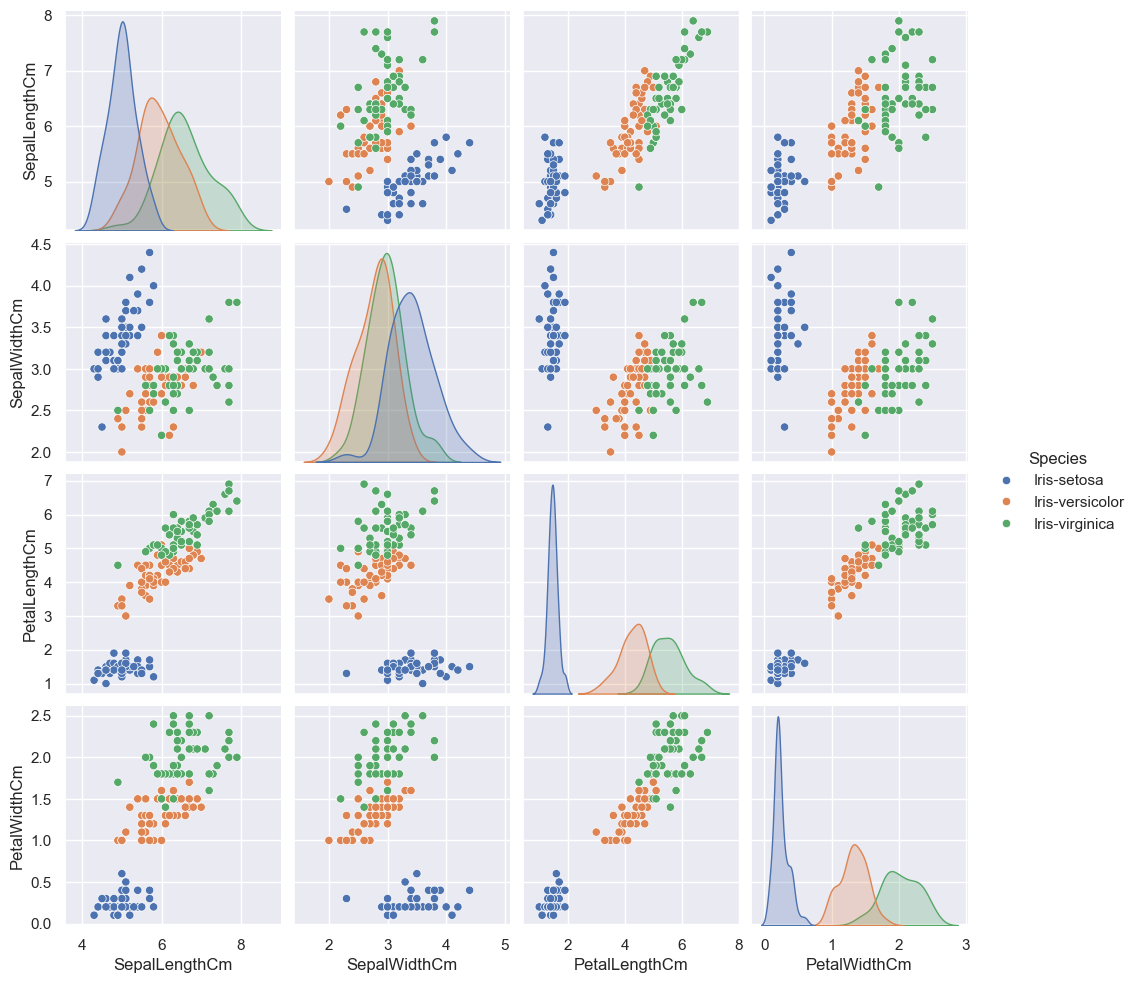

In [9]:
# Pairplot of the dataset
sns.pairplot(dataset, hue='Species')  
plt.show()


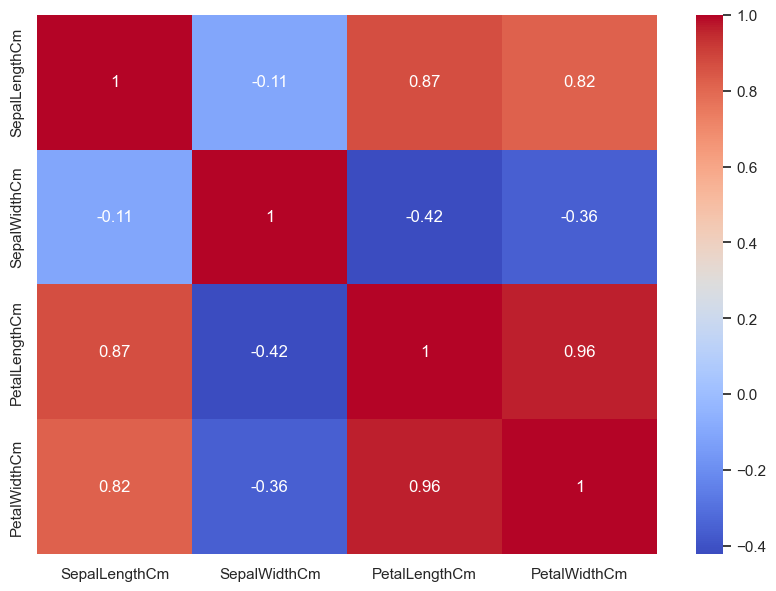

In [10]:
# Correlation matrix
plt.figure(figsize=(10, 7))
sns.heatmap(dataset.drop('Species', axis=1).corr(), annot=True, cmap='coolwarm')  # Use the correct column name
plt.show()

array([[<Axes: title={'center': 'SepalLengthCm'}>,
        <Axes: title={'center': 'SepalWidthCm'}>],
       [<Axes: title={'center': 'PetalLengthCm'}>,
        <Axes: title={'center': 'PetalWidthCm'}>]], dtype=object)

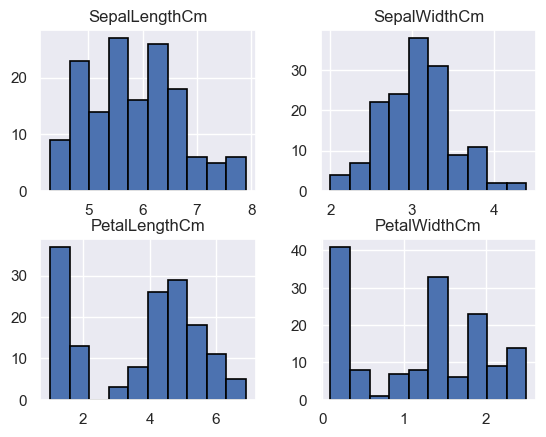

In [11]:
dataset.hist(edgecolor='black', linewidth=1.2)

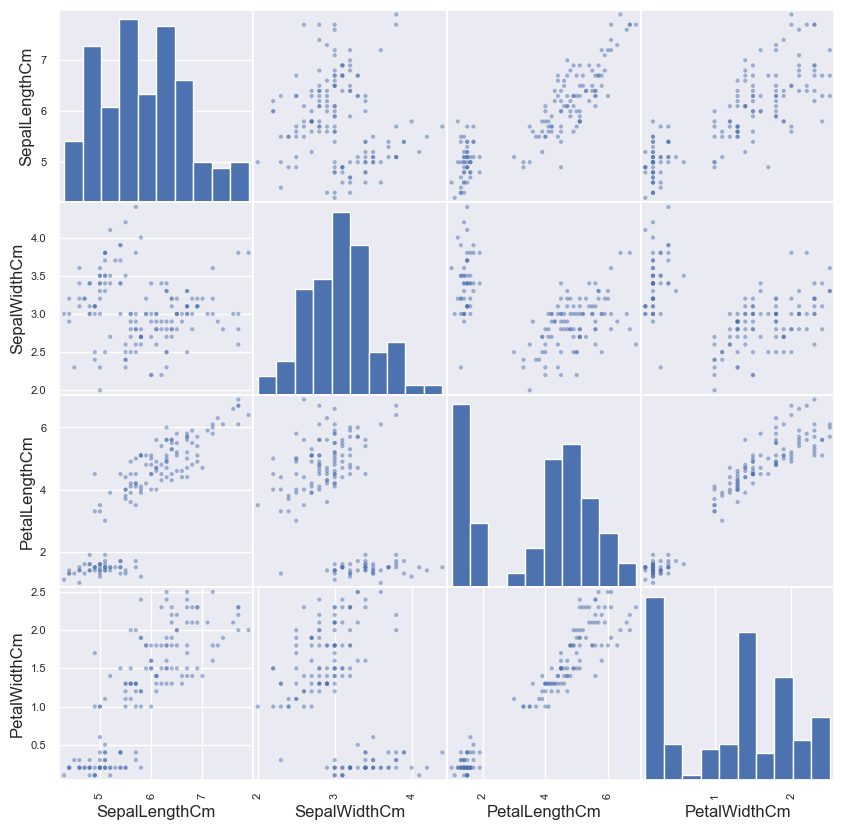

In [12]:
from pandas.plotting import scatter_matrix
# scatter plot matrix
scatter_matrix(dataset,figsize=(10,10))
plt.show()

## Step 4: Prepare the Data for Training

In [13]:
!pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Split the data into features and target
X = dataset.drop('Species', axis=1)
y = dataset['Species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Step 5: Train the Model

In [15]:
# Importing metrics for evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split


In [16]:
# Separating the dataset into features and labels
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:,-1].values

In [17]:
 # Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=12)

In [18]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
classifier_logreg = LogisticRegression()
classifier_logreg.fit(X_train, y_train)

y_pred = classifier_logreg.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_test,y_pred)*100)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30

[[12  0  0]
 [ 0  8  1]
 [ 0  0  9]]
accuracy is 96.66666666666667


In [19]:
# Support Vector Machine's 
from sklearn.svm import SVC

classifier_svc= SVC()
classifier_svc.fit(X_train, y_train)

y_pred = classifier_svc.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test)*100)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30

[[12  0  0]
 [ 0  8  1]
 [ 0  0  9]]
accuracy is 96.66666666666667


In [20]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test)*100)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[12  0  0]
 [ 0  9  0]
 [ 0  0  9]]
accuracy is 100.0


In [21]:
 # Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier()
classifier_dt.fit(X_train, y_train)
# Making predictions and evaluating the model
y_pred_dt = classifier_dt.predict(X_test)
print(classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))
print('Accuracy: {:.2f}%'.format(accuracy_score(y_test, y_pred_dt) * 100))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.78      0.88         9
 Iris-virginica       0.82      1.00      0.90         9

       accuracy                           0.93        30
      macro avg       0.94      0.93      0.92        30
   weighted avg       0.95      0.93      0.93        30

[[12  0  0]
 [ 0  7  2]
 [ 0  0  9]]
Accuracy: 93.33%


## PredictionforNewData

In [22]:
def predict_species(model, features):
    prediction = model.predict([features])
    return prediction[0]

# Taking input from the user for a new Iris flower
print("enter the measurements of the new Iris flower:")
sepal_len = float(input("Enter the Sepal Length: "))
sepal_wid = float(input("Enter the Sepal Width: "))
petal_len = float(input("Enter the Petal Length: "))
petal_wid = float(input("Enter the Petal Width: "))
new= [sepal_len, sepal_wid, petal_len, petal_wid]

# Predicting the species using different models
pred_lr = predict_species(classifier_logreg, new)
print(f"predicttion with Logistic Regression: {pred_lr}")

pred_svc = predict_species(classifier_svc, new)  # Define classifier_svc
print(f"predicttion with Support Vector Machine: {pred_svc}")

pred_knn = predict_species(classifier, new)  # Define classifier_knn
print(f"predicttion with K-Nearest Neighbors: {pred_knn}")

pred_dt = predict_species(classifier_dt, new)
print(f"predicttion with Decision Tree Classifier: {pred_dt}")


enter the measurements of the new Iris flower:
predicttion with Logistic Regression: Iris-virginica
predicttion with Support Vector Machine: Iris-virginica
predicttion with K-Nearest Neighbors: Iris-versicolor
predicttion with Decision Tree Classifier: Iris-virginica


## Model Comparison

In [23]:
# Define accuracy values for each model
results = {
    'Logistic Regression': 96.6,
    'Support Vector Machine': 96.6,
    'K-Nearest Neighbors': 100.0,
    'Decision Tree Classifier': 96.67
}

# Print all model accuracies
print('\nModel Comparison:')
for model_name, accuracy in results.items():
    print('{}: {:.2f}'.format(model_name, accuracy))



Model Comparison:
Logistic Regression: 96.60
Support Vector Machine: 96.60
K-Nearest Neighbors: 100.00
Decision Tree Classifier: 96.67


In [24]:
#save the model
import pickle
filename = 'saved_model.sav'
pickle.dump(classifier_dt,open(filename,'wb'))


In [26]:
load_model =pickle.load(open(filename,'rb'))

In [27]:
load_model.predict([[6.0,2.2,4.0,1.0]])

array(['Iris-versicolor'], dtype=object)